# Module 6 - Correlation & Linear Regression

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

## Correlation

In [2]:
Location = "datasets/diamonds.csv"
df = pd.read_csv(Location)

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


## Linear Regression

In [4]:
import statsmodels.formula.api as smf

In [10]:
result = smf.ols('price ~ color + cut + carat ', data=df).fit()

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 3.315e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        06:26:43   Log-Likelihood:            -4.6851e+05
No. Observations:               53940   AIC:                         9.370e+05
Df Residuals:                   53928   BIC:                         9.372e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3760.0541     41.322    -90.994      0.000   -3841.045   -3679.063
color[T.E]         -90.6508     22.633     -4.005      0.000    -135.011     -46.290
color[T.F]         -71.7226     22.780     -3.148      0.002    -116.372     -27.074
color[T.G]        -103.6154     22.073     -4.694      0.000    -146.879     -60.352
color[T.H]        -732.1676     23.707    -30.883      0.000    -778.634    -685.701
color[T.I]       -1075.6757     26.584    -40.464      0.000   -1127.780   -1023.572
color[T.J]       -1908.5627     32.875    -58.055      0.000   -1972.998   -1844.128
cut[T.Good]       1126.9829     41.227     27.336      0.000    1046.177    1207.789
cut[T.Ideal]      1808.0372     37.290     48.486      0.000    1734.949    1881.125
cut[T.Premium]    1442.7306     37.779     38.189      0.000    1368.683    1516.778
cut[T.Very Good]  1517.9952     38.137     39.804      0.000    1443.246    1592.744
carat             8183.7430     13.897    588.885      0.000    8156.505    8210.981
==============================================================================
Omnibus:                    12946.397   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163397.551
Skew:                           0.800   Prob(JB):                         0.00
Kurtosis:                      11.375   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With color cut being factored out starting price of carat is about $3,400 and 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


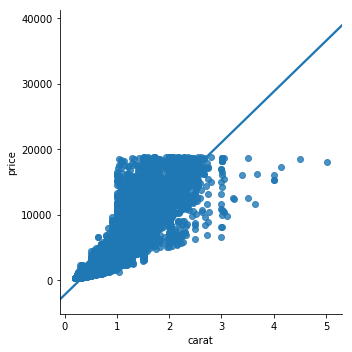

In [15]:
sns.lmplot(x='carat', y='price', data=df)

In [12]:
#remove age from regression, not very correlated
result = smf.ols('price ~  carat + x + y + z', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 7.892e+04
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        07:14:08   Log-Likelihood:            -4.7187e+05
No. Observations:               53940   AIC:                         9.437e+05
Df Residuals:                   53935   BIC:                         9.438e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1921.1740    104.373     18.407      0.000    1716.601    2125.747
carat       1.023e+04     62.937    162.607      0.000    1.01e+04    1.04e+04
x           -884.2091     40.470    -21.848      0.000    -963.532    -804.887
y            166.0384     25.858      6.421      0.000     115.356     216.721
z           -576.2035     39.282    -14.668      0.000    -653.197    -499.210
==============================================================================
Omnibus:                    14400.324   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336485.128
Skew:                           0.743   Prob(JB):                         0.00
Kurtosis:                      15.145   Cond. No.                         171.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#set coefficient to 0
result = smf.ols(formula='price ~ carat - 1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 4.004e+05
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        06:49:27   Log-Likelihood:            -4.8462e+05
No. Observations:               53940   AIC:                         9.692e+05
Df Residuals:                   53939   BIC:                         9.692e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       5666.2701      8.955    632.750      0.000    5648.718    5683.822
==============================================================================
Omnibus:                    26109.286   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146424.223
Skew:                           2.340   Prob(JB):                         0.00
Kurtosis:                       9.576   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""